# Improving the reliability of data storage systems project[1]

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'project1_dataset.xlsx'
df = pd.read_excel(file_path)
df = df.sample(frac=1.0, random_state=42).reset_index(drop=True)


In [3]:
column_mapping = {
    'r_5': 'r_5: Reallocated Sector Count',
    'n_5': 'n_5: Reallocated Sector Count',
    'r_183': 'r_183: SATA Downshift Error',
    'n_183': 'n_183: SATA Downshift Error',
    'r_184': 'r_184: End-to-End Errors',
    'n_184': 'n_184: End-to-End Errors',
    'r_187': 'r_187: Reported Uncorrectable Errors',
    'n_187': 'n_187: Reported Uncorrectable Errors',
    'r_195': 'r_195: Hardware ECC Recovered',
    'n_195': 'n_195: Hardware ECC Recovered',
    'r_197': 'r_197: Current Pending Sector Count',
    'n_197': 'n_197: Current Pending Sector Count',
    'r_199': 'r_199: Ultra DMA CRC Error Count',
    'n_199': 'n_199: Ultra DMA CRC Error Count',
    'r_171': 'r_171: Program Failed Count',
    'n_171': 'n_171: Program Failed Count',
    'r_172': 'r_172: Erase Failed Count',
    'n_172': 'n_172: Erase Failed Count',
    'n_170': 'n_170: Available Reserved Blocks',
    'n_233': 'n_233: Media Wearout Indicator',
    'r_241': 'r_241: Number of Blocks Written',
    'n_241': 'n_241: Number of Blocks Written',
    'r_242': 'r_242: Number of Blocks Read',
    'n_242': 'n_242: Number of Blocks Read',
    'r_9': 'r_9: Power on Hours',
    'n_9': 'n_9: Power on Hours',
    'r_12': 'r_12: Power Cycle Count',
    'n_12': 'n_12: Power Cycle Count',
    'r_174': 'r_174: Unexpected Power Loss Count',
    'n_174': 'n_174: Unexpected Power Loss Count',
    'failure': 'failure'
}
df.rename(columns=column_mapping, inplace=True)

In [4]:
df.head()

,r_5: Reallocated Sector Count,n_5: Reallocated Sector Count,r_183: SATA Downshift Error,n_183: SATA Downshift Error,r_184: End-to-End Errors,n_184: End-to-End Errors,r_187: Reported Uncorrectable Errors,n_187: Reported Uncorrectable Errors,r_195: Hardware ECC Recovered,n_195: Hardware ECC Recovered,...,n_241: Number of Blocks Written,r_242: Number of Blocks Read,n_242: Number of Blocks Read,r_9: Power on Hours,n_9: Power on Hours,r_12: Power Cycle Count,n_12: Power Cycle Count,r_174: Unexpected Power Loss Count,n_174: Unexpected Power Loss Count,failure
0,0.0,100.0,0.000000,100.000000,0.000000,100.000000,0.000000,100.000000,0.674183,71.785470,...,100.000000,1.995498e-05,100.000000,0.332267,100.000000,0.011169,100.000000,0.020628,100,1
1,0.0,100.0,0.000000,100.000000,0.000000,100.000000,0.000000,100.000000,0.000000,49.748744,...,94.913689,4.955898e-01,97.383575,0.219737,100.000000,0.013961,100.000000,0.027503,100,0
2,0.0,100.0,0.000000,100.000000,0.000000,100.000000,0.000000,100.000000,0.000000,100.000000,...,85.714286,4.955898e-01,97.383575,0.604700,91.919192,0.007818,98.989899,0.031625,100,0
3,0.0,96.0,0.001083,99.979577,0.000224,99.996411,0.000707,99.999279,0.674183,71.785470,...,94.913689,4.955898e-01,97.383575,0.752542,100.000000,0.018285,99.753151,0.031625,100,0
4,0.0,100.0,0.000000,100.000000,0.000000,100.000000,0.000000,100.000000,0.674183,71.785470,...,100.000000,2.128525e-07,100.000000,0.714754,100.000000,0.006143,100.000000,0.006876,100,0


In [5]:
print("Shape of Data:")
print(df.shape)
print("\nColumns names:")
print(df.columns)
print("\nEach column data type:")
print(df.dtypes)

Shape of Data:
(4999, 31)

Columns names:
Index(['r_5: Reallocated Sector Count', 'n_5: Reallocated Sector Count',
       'r_183: SATA Downshift Error', 'n_183: SATA Downshift Error',
       'r_184: End-to-End Errors', 'n_184: End-to-End Errors',
       'r_187: Reported Uncorrectable Errors',
       'n_187: Reported Uncorrectable Errors', 'r_195: Hardware ECC Recovered',
       'n_195: Hardware ECC Recovered', 'r_197: Current Pending Sector Count',
       'n_197: Current Pending Sector Count',
       'r_199: Ultra DMA CRC Error Count', 'n_199: Ultra DMA CRC Error Count',
       'r_171: Program Failed Count', 'n_171: Program Failed Count',
       'r_172: Erase Failed Count', 'n_172: Erase Failed Count',
       'n_170: Available Reserved Blocks', 'n_233: Media Wearout Indicator',
       'r_241: Number of Blocks Written', 'n_241: Number of Blocks Written',
       'r_242: Number of Blocks Read', 'n_242: Number of Blocks Read',
       'r_9: Power on Hours', 'n_9: Power on Hours', 'r_12: Pow

In [6]:
df = df.astype('float64', errors='ignore')
print(df.dtypes)

r_5: Reallocated Sector Count           float64
n_5: Reallocated Sector Count           float64
r_183: SATA Downshift Error             float64
n_183: SATA Downshift Error             float64
r_184: End-to-End Errors                float64
n_184: End-to-End Errors                float64
r_187: Reported Uncorrectable Errors    float64
n_187: Reported Uncorrectable Errors    float64
r_195: Hardware ECC Recovered           float64
n_195: Hardware ECC Recovered           float64
r_197: Current Pending Sector Count     float64
n_197: Current Pending Sector Count     float64
r_199: Ultra DMA CRC Error Count        float64
n_199: Ultra DMA CRC Error Count        float64
r_171: Program Failed Count             float64
n_171: Program Failed Count             float64
r_172: Erase Failed Count               float64
n_172: Erase Failed Count               float64
n_170: Available Reserved Blocks        float64
n_233: Media Wearout Indicator          float64
r_241: Number of Blocks Written         

In [7]:
df['failure'].value_counts()

failure
0.0    3999
1.0    1000
Name: count, dtype: int64

In [8]:
df.describe() 

,r_5: Reallocated Sector Count,n_5: Reallocated Sector Count,r_183: SATA Downshift Error,n_183: SATA Downshift Error,r_184: End-to-End Errors,n_184: End-to-End Errors,r_187: Reported Uncorrectable Errors,n_187: Reported Uncorrectable Errors,r_195: Hardware ECC Recovered,n_195: Hardware ECC Recovered,...,n_241: Number of Blocks Written,r_242: Number of Blocks Read,n_242: Number of Blocks Read,r_9: Power on Hours,n_9: Power on Hours,r_12: Power Cycle Count,n_12: Power Cycle Count,r_174: Unexpected Power Loss Count,n_174: Unexpected Power Loss Count,failure
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,...,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.0,4999.00000
mean,0.173383,99.526963,0.001189,99.852729,0.000008,99.992858,0.000910,99.995945,1.021716,76.804769,...,92.648612,0.702078,95.840262,0.434214,97.706830,0.017398,99.588058,0.032125,100.0,0.20004
std,1.962036,2.792436,0.022691,1.825500,0.000133,0.252677,0.032281,0.080722,5.301764,20.800966,...,6.269554,1.373174,4.789325,0.201771,3.053807,0.090940,0.502592,0.151743,0.0,0.40007
min,0.000000,0.000000,0.000000,0.000000,0.000000,83.838384,0.000000,95.959596,0.000000,0.000000,...,57.142857,0.000000,75.000000,0.000145,90.909091,0.000558,95.959596,0.000000,100.0,0.00000
25%,0.000000,100.000000,0.000000,100.000000,0.000000,100.000000,0.000000,100.000000,0.000000,49.748744,...,85.714286,0.000039,97.383575,0.287339,93.939394,0.008377,98.989899,0.017190,100.0,0.00000
50%,0.000000,100.000000,0.000000,100.000000,0.000000,100.000000,0.000000,100.000000,0.000000,71.785470,...,94.913689,0.495590,97.383575,0.469722,100.000000,0.011169,100.000000,0.031625,100.0,0.00000
75%,0.000000,100.000000,0.000000,100.000000,0.000000,100.000000,0.000000,100.000000,0.674183,100.000000,...,100.000000,0.495590,100.000000,0.602151,100.000000,0.015637,100.000000,0.031625,100.0,0.00000
max,47.977070,100.000000,0.797978,100.000000,0.008293,100.000000,1.863683,100.000000,91.747675,100.000000,...,100.000000,23.548387,100.000000,0.891171,100.000000,2.892804,100.000000,5.933854,100.0,1.00000


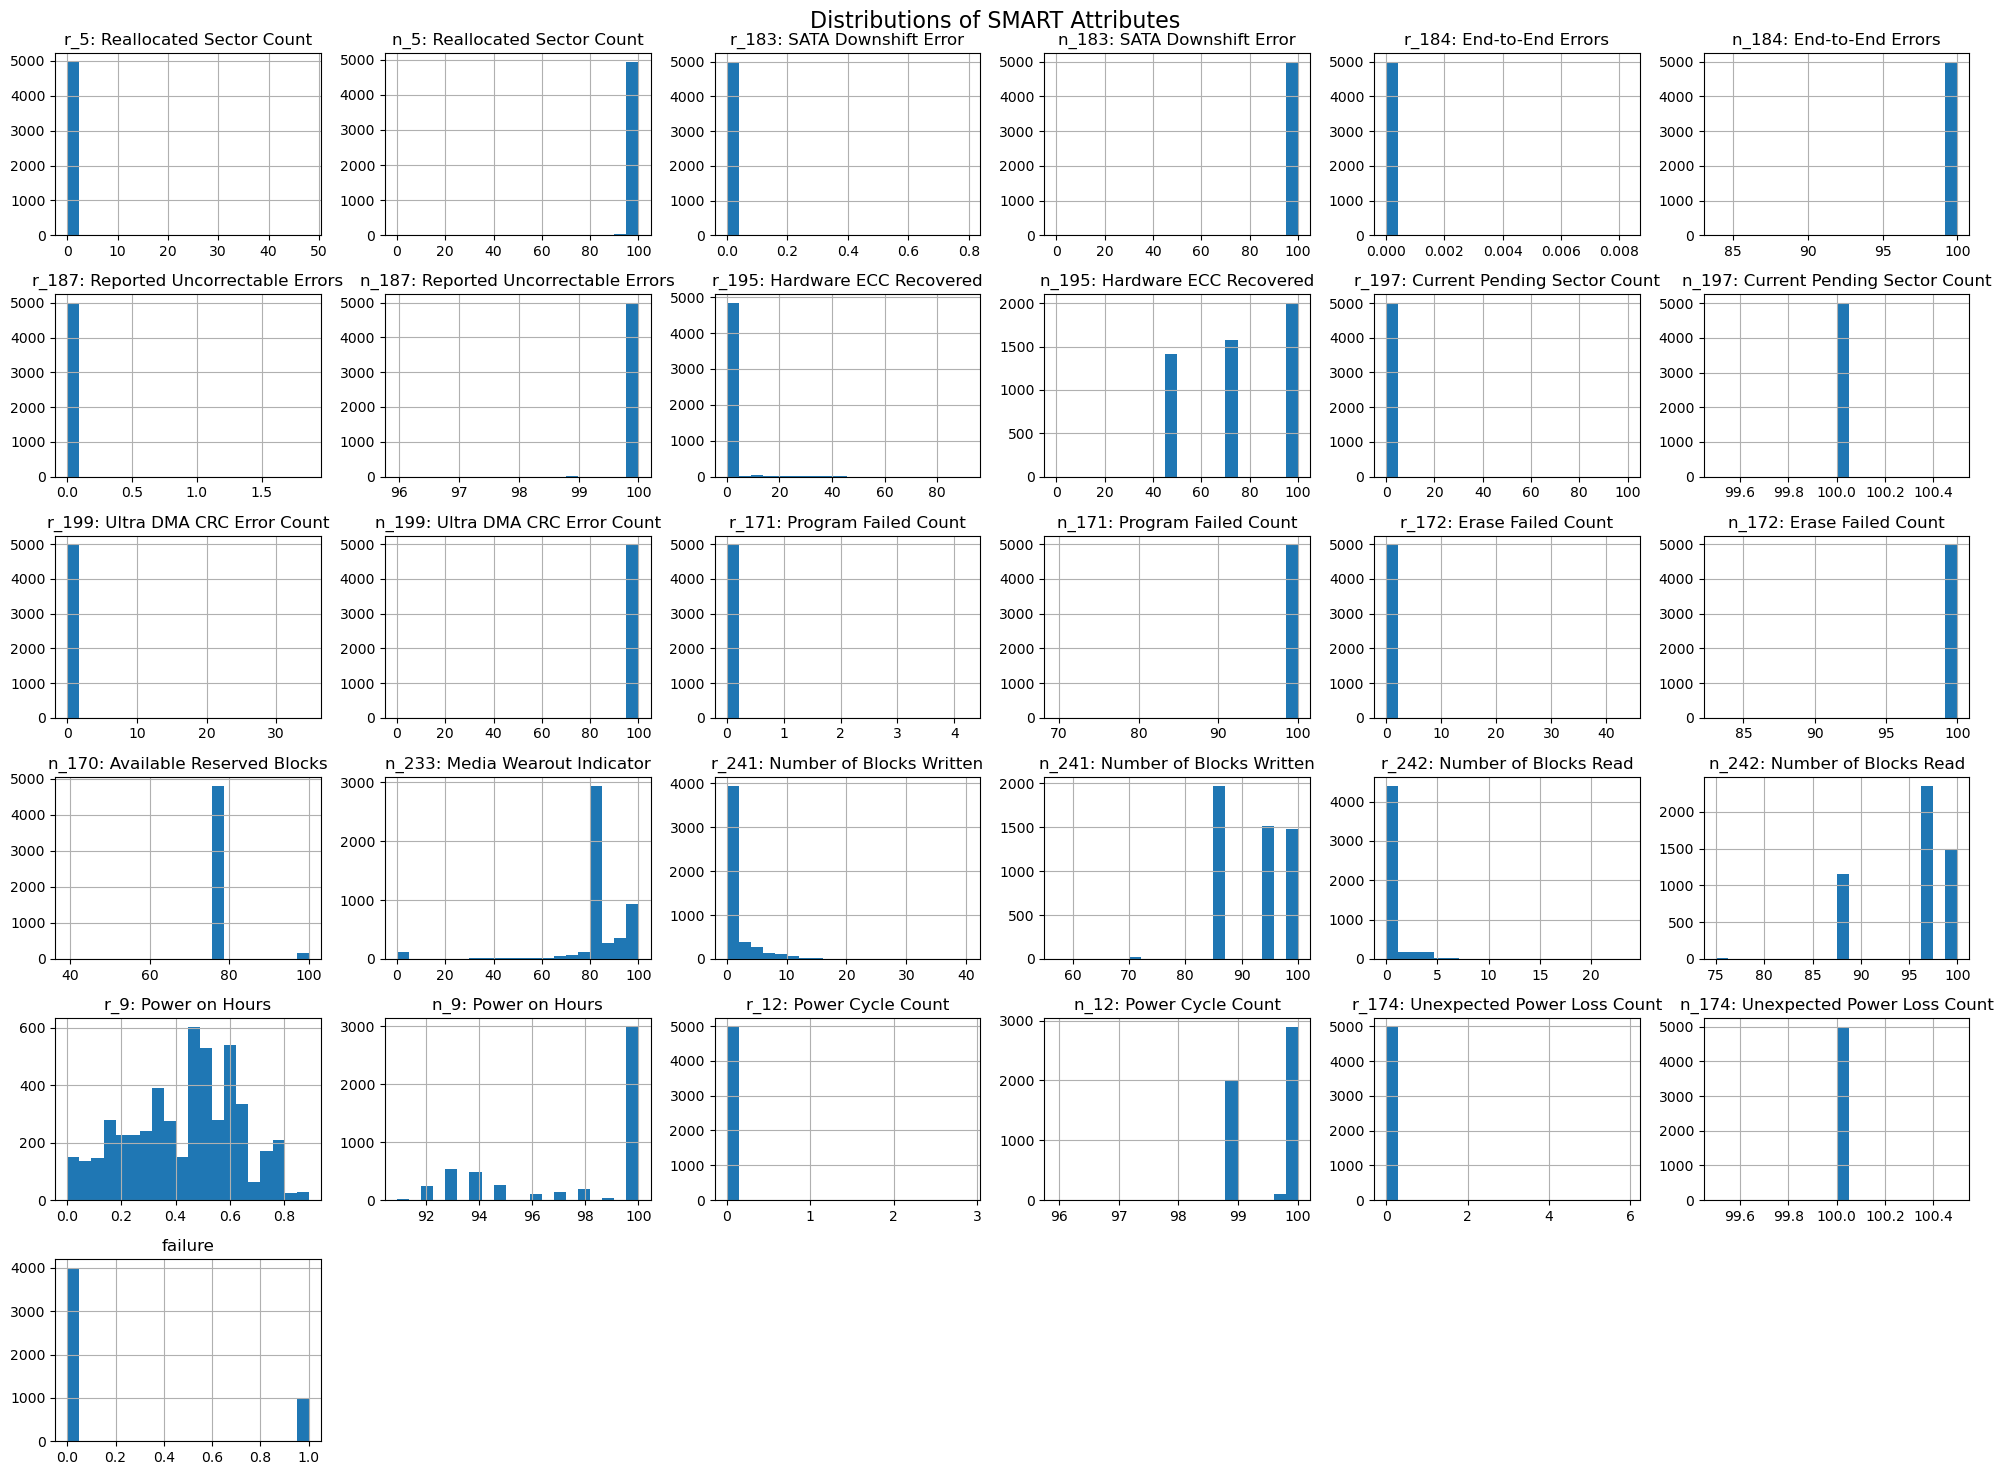

In [9]:
df.hist(bins=20, figsize=(20, 15), layout=(6, 6))
plt.suptitle("Distributions of SMART Attributes", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

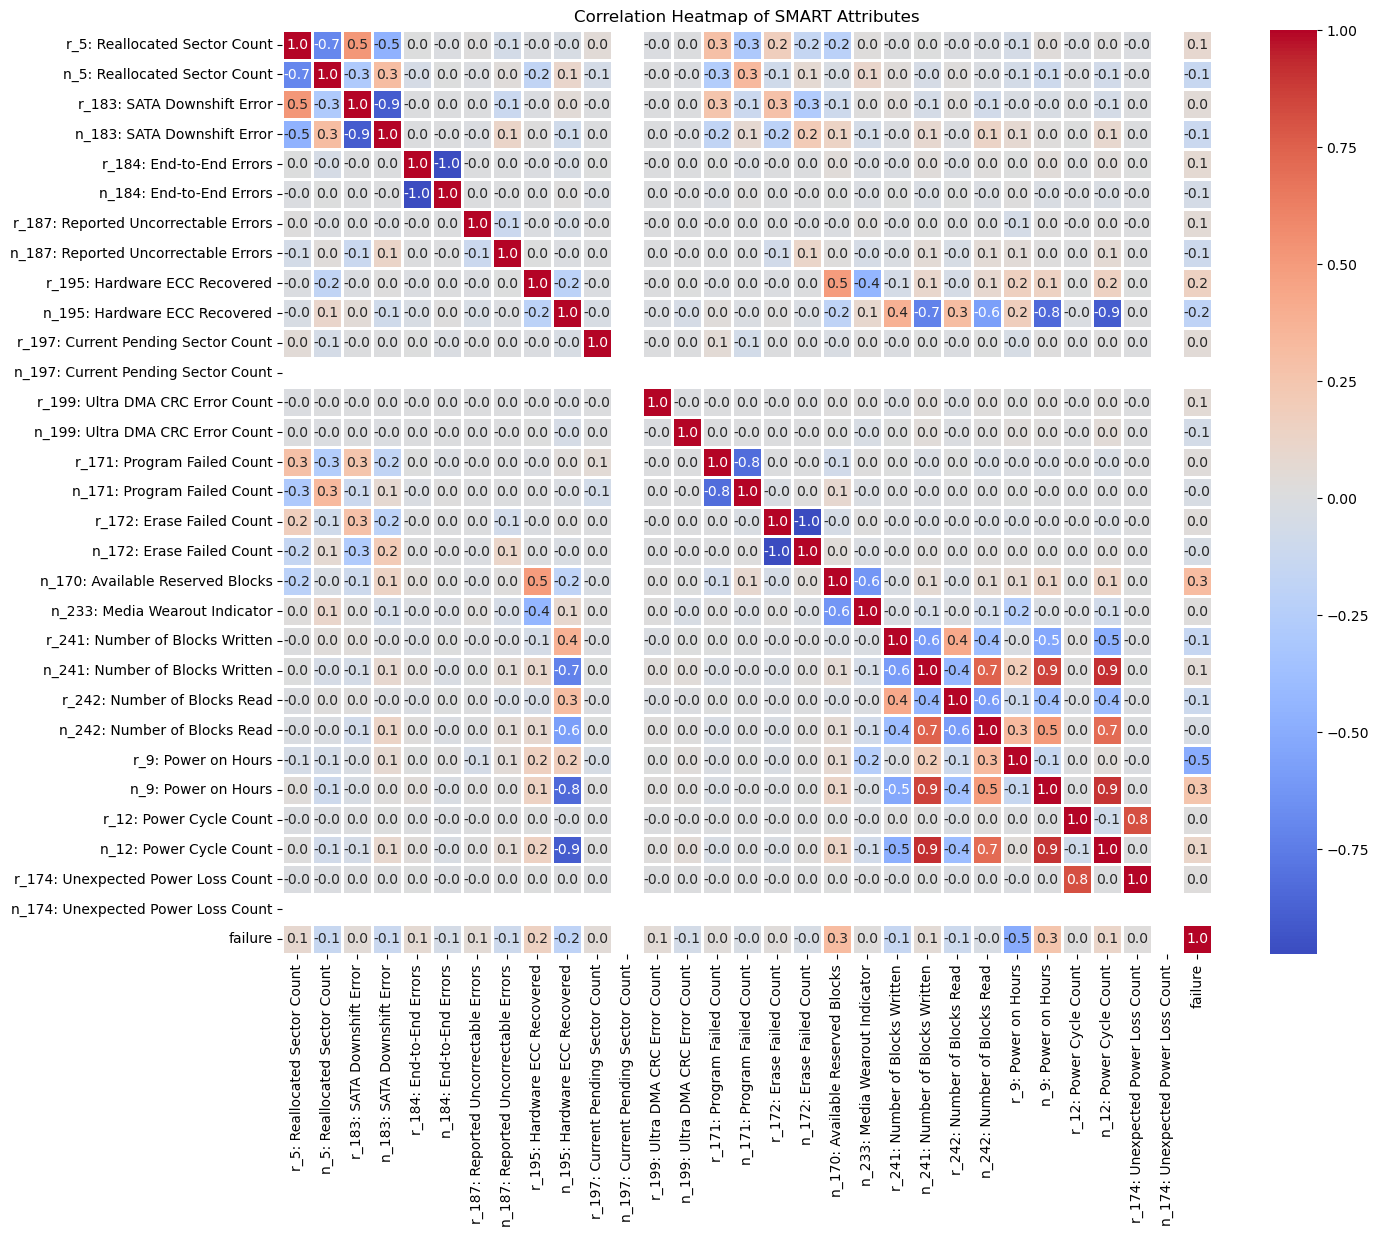

In [19]:
correlation_matrix = df.corr(method='pearson')

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar=True, linewidths=1, fmt='.1f')
plt.title("Correlation Heatmap of SMART Attributes")
plt.show()

In [13]:
print(df['n_197: Current Pending Sector Count'].value_counts()) 
print(df['n_174: Unexpected Power Loss Count'].value_counts())  

n_197: Current Pending Sector Count
100.0    4999
Name: count, dtype: int64
n_174: Unexpected Power Loss Count
100.0    4999
Name: count, dtype: int64


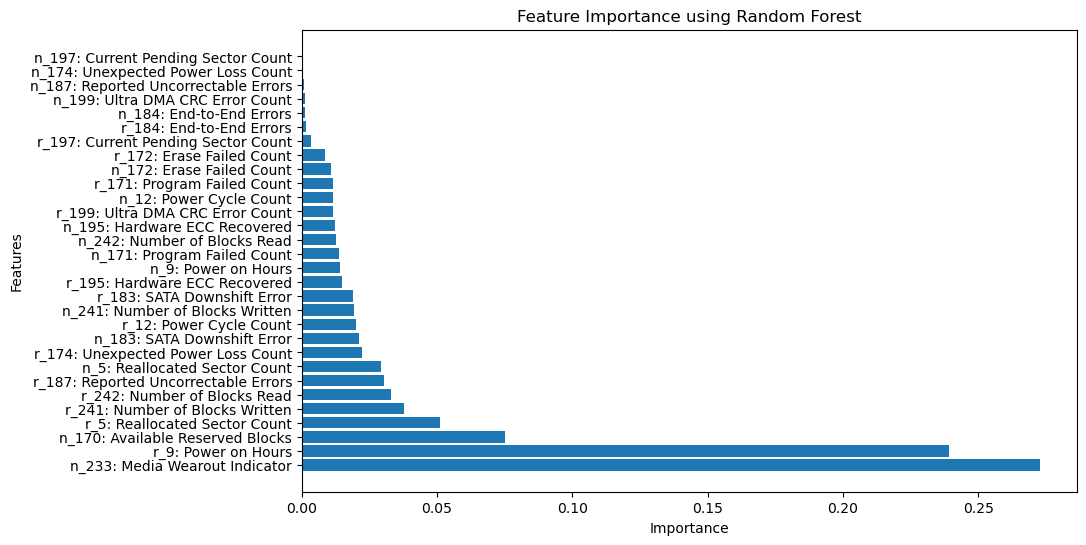

n_233: Media Wearout Indicator: 0.2728
r_9: Power on Hours: 0.2390
n_170: Available Reserved Blocks: 0.0752
r_5: Reallocated Sector Count: 0.0509
r_241: Number of Blocks Written: 0.0379
r_242: Number of Blocks Read: 0.0330
r_187: Reported Uncorrectable Errors: 0.0305
n_5: Reallocated Sector Count: 0.0293
r_174: Unexpected Power Loss Count: 0.0222
n_183: SATA Downshift Error: 0.0213
r_12: Power Cycle Count: 0.0200
n_241: Number of Blocks Written: 0.0194
r_183: SATA Downshift Error: 0.0188
r_195: Hardware ECC Recovered: 0.0149
n_9: Power on Hours: 0.0140
n_171: Program Failed Count: 0.0137
n_242: Number of Blocks Read: 0.0127
n_195: Hardware ECC Recovered: 0.0123
r_199: Ultra DMA CRC Error Count: 0.0115
n_12: Power Cycle Count: 0.0115
r_171: Program Failed Count: 0.0115
n_172: Erase Failed Count: 0.0107
r_172: Erase Failed Count: 0.0088
r_197: Current Pending Sector Count: 0.0035
r_184: End-to-End Errors: 0.0016
n_184: End-to-End Errors: 0.0011
n_199: Ultra DMA CRC Error Count: 0.0011
n_

In [16]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# فرض می‌کنیم df داده‌های SMART است و 'failure' ستون هدف است که وضعیت دیسک‌ها را مشخص می‌کند.
X = df.drop(columns=['failure'])  # ویژگی‌های SMART
y = df['failure']  # برچسب‌های هدف

# ایجاد مدل Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# محاسبه اهمیت ویژگی‌ها
feature_importances = rf_model.feature_importances_

# نمایش اهمیت ویژگی‌ها
features = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importance using Random Forest")
plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices], align="center")
plt.yticks(range(len(sorted_indices)), features[sorted_indices])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# چاپ مقدار دقیق اهمیت هر ویژگی
for feature, importance in zip(features[sorted_indices], feature_importances[sorted_indices]):
    print(f"{feature}: {importance:.4f}")


In [24]:
from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator

X = df.copy()
hc = HillClimbSearch(X)
best_model = hc.estimate(scoring_method=BicScore(X))

print("Edges in the learned Bayesian Network:")
print(best_model.edges())

model = BayesianNetwork(best_model.edges())
model.fit(X, estimator=MaximumLikelihoodEstimator)

from pgmpy.visualization import plot_model
plot_model(model, node_color='lightblue', node_size=2000)
plt.show()


ModuleNotFoundError: No module named 'pgmpy.visualization'

  0%|          | 25/1000000 [00:03<41:54:23,  6.63it/s]


Edges in the learned Bayesian Network:
[('n_5: Reallocated Sector Count', 'n_183: SATA Downshift Error'), ('r_184: End-to-End Errors', 'n_184: End-to-End Errors'), ('n_195: Hardware ECC Recovered', 'n_241: Number of Blocks Written'), ('n_195: Hardware ECC Recovered', 'n_12: Power Cycle Count'), ('r_197: Current Pending Sector Count', 'n_242: Number of Blocks Read'), ('n_171: Program Failed Count', 'n_172: Erase Failed Count'), ('n_172: Erase Failed Count', 'r_172: Erase Failed Count'), ('n_172: Erase Failed Count', 'r_171: Program Failed Count'), ('n_172: Erase Failed Count', 'n_170: Available Reserved Blocks'), ('n_233: Media Wearout Indicator', 'failure'), ('n_241: Number of Blocks Written', 'n_242: Number of Blocks Read'), ('n_241: Number of Blocks Written', 'n_12: Power Cycle Count'), ('n_242: Number of Blocks Read', 'n_233: Media Wearout Indicator'), ('n_9: Power on Hours', 'r_197: Current Pending Sector Count'), ('n_12: Power Cycle Count', 'n_9: Power on Hours'), ('n_12: Power Cy

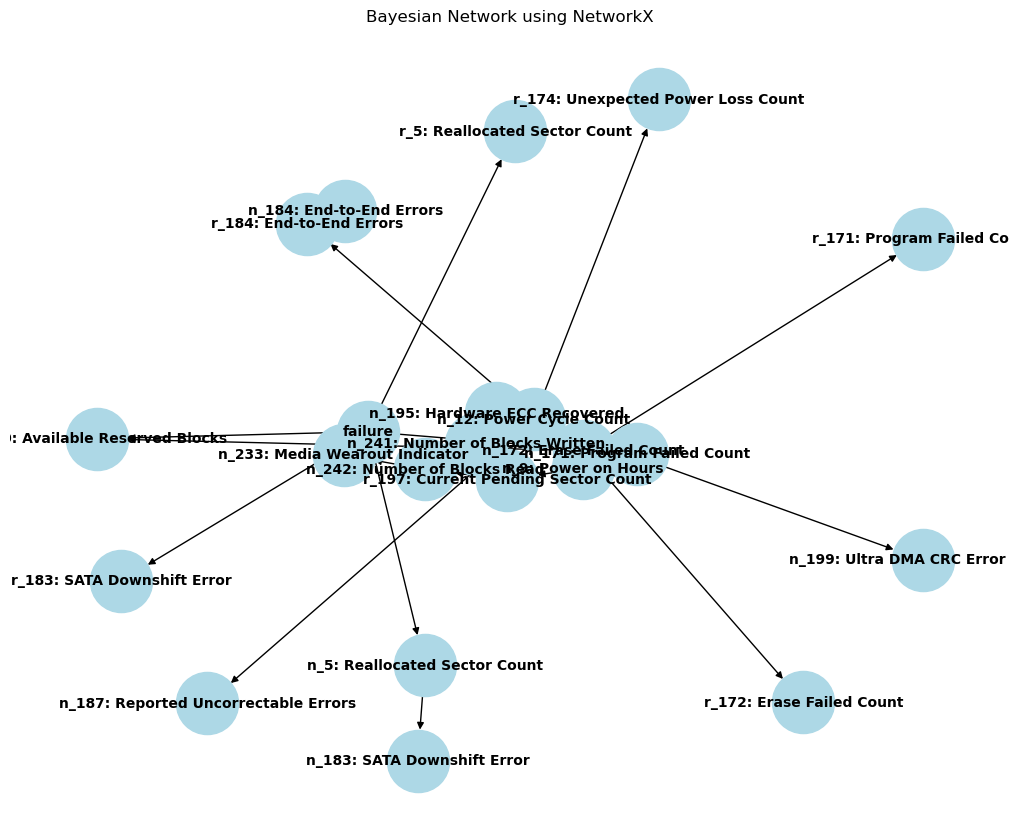

In [25]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator

# فرض کنید df داده‌های شما است
X = df.copy()

# مرحله یادگیری ساختار شبکه بیزی با استفاده از HillClimbSearch
hc = HillClimbSearch(X)
best_model = hc.estimate(scoring_method=BicScore(X))

# چاپ اتصالات یادگرفته شده در شبکه بیزی
print("Edges in the learned Bayesian Network:")
print(best_model.edges())

# ساخت مدل بیزی با استفاده از ساختار یادگرفته شده
model = BayesianNetwork(best_model.edges())
model.fit(X, estimator=MaximumLikelihoodEstimator)

# رسم شبکه با استفاده از networkx
G = nx.DiGraph()
G.add_edges_from(model.edges())
pos = nx.spring_layout(G)  # الگوریتم چیدمان

# رسم گراف با ویژگی‌های دلخواه
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold', arrows=True)
plt.title("Bayesian Network using NetworkX")
plt.show()


## Section 1: Predicting disk failure time

## Section 1: Predicting disk failure time

## Section 2: Calculating threshold values ​​for various SMART features

## Section 3: Abnormality detection

## Section 4: Correlation between Smart Features

In [4]:
pd.set_option('display.max_rows',None)
file_2015.isna().sum()


date                          0
serial_number                 0
model                         0
capacity_bytes                0
failure                       0
smart_1_normalized            1
smart_1_raw                   1
smart_2_normalized      1243993
smart_2_raw             1243993
smart_3_normalized            1
smart_3_raw                   1
smart_4_normalized            1
smart_4_raw                   1
smart_5_normalized            1
smart_5_raw                   1
smart_7_normalized            1
smart_7_raw                   1
smart_8_normalized      1243993
smart_8_raw             1243993
smart_9_normalized            1
smart_9_raw                   1
smart_10_normalized           1
smart_10_raw                  1
smart_11_normalized     1243993
smart_11_raw            1243993
smart_12_normalized           1
smart_12_raw                  1
smart_13_normalized     1243993
smart_13_raw            1243993
smart_15_normalized     1243993
smart_15_raw            1243993
smart_22

In [5]:
# we clearly see the null values  in some column are max so it shoulde beeter be dealt with
# These are the columns
drop_columns = file.columns[file.isna().sum() > 400]
file = file.drop(drop_columns, axis=1)


In [6]:
file.dropna(inplace =True)

In [7]:
file.isna().sum()

date                    0
serial_number           0
model                   0
capacity_bytes          0
failure                 0
smart_1_normalized      0
smart_1_raw             0
smart_3_normalized      0
smart_3_raw             0
smart_4_normalized      0
smart_4_raw             0
smart_5_normalized      0
smart_5_raw             0
smart_7_normalized      0
smart_7_raw             0
smart_9_normalized      0
smart_9_raw             0
smart_10_normalized     0
smart_10_raw            0
smart_12_normalized     0
smart_12_raw            0
smart_183_normalized    0
smart_183_raw           0
smart_184_normalized    0
smart_184_raw           0
smart_187_normalized    0
smart_187_raw           0
smart_188_normalized    0
smart_188_raw           0
smart_189_normalized    0
smart_189_raw           0
smart_190_normalized    0
smart_190_raw           0
smart_191_normalized    0
smart_191_raw           0
smart_192_normalized    0
smart_192_raw           0
smart_193_normalized    0
smart_193_ra

In [8]:
file.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,...,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw,smart_240_normalized,smart_240_raw,smart_241_normalized,smart_241_raw,smart_242_normalized,smart_242_raw
0,2015-01-01,Z300YN6R,ST4000DM000,4000787030016,0,117.0,134283496.0,97.0,0.0,100.0,...,100.0,0.0,200.0,0.0,100.0,1.624000e+03,100.0,8.441971e+09,100.0,2.469779e+10
1,2015-01-01,W300T09N,ST4000DM000,4000787030016,0,120.0,235812736.0,91.0,0.0,100.0,...,100.0,0.0,200.0,0.0,100.0,2.311122e+13,100.0,1.025090e+10,100.0,2.269857e+10
2,2015-01-01,Z3025923,ST4000DM000,4000787030016,1,117.0,159417104.0,99.0,0.0,100.0,...,100.0,0.0,200.0,0.0,100.0,1.350000e+03,100.0,8.734935e+09,100.0,2.309538e+10
3,2015-01-01,Z300GPJ7,ST4000DM000,4000787030016,0,110.0,25333728.0,92.0,0.0,100.0,...,100.0,0.0,200.0,0.0,100.0,1.436581e+14,100.0,2.187359e+10,100.0,1.156925e+11
4,2015-01-01,Z300VALY,ST4000DM000,4000787030016,0,117.0,139107936.0,96.0,0.0,100.0,...,100.0,0.0,200.0,0.0,100.0,1.703169e+14,100.0,1.840603e+10,100.0,4.845404e+10


In [9]:
columns_to_drop = ['date', 'serial_number']
file.drop(columns=columns_to_drop, inplace=True)

In [10]:
file.head()

,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,...,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw,smart_240_normalized,smart_240_raw,smart_241_normalized,smart_241_raw,smart_242_normalized,smart_242_raw
0,ST4000DM000,4000787030016,0,117.0,134283496.0,97.0,0.0,100.0,3.0,100.0,...,100.0,0.0,200.0,0.0,100.0,1.624000e+03,100.0,8.441971e+09,100.0,2.469779e+10
1,ST4000DM000,4000787030016,0,120.0,235812736.0,91.0,0.0,100.0,14.0,100.0,...,100.0,0.0,200.0,0.0,100.0,2.311122e+13,100.0,1.025090e+10,100.0,2.269857e+10
2,ST4000DM000,4000787030016,1,117.0,159417104.0,99.0,0.0,100.0,1.0,100.0,...,100.0,0.0,200.0,0.0,100.0,1.350000e+03,100.0,8.734935e+09,100.0,2.309538e+10
3,ST4000DM000,4000787030016,0,110.0,25333728.0,92.0,0.0,100.0,10.0,100.0,...,100.0,0.0,200.0,0.0,100.0,1.436581e+14,100.0,2.187359e+10,100.0,1.156925e+11
4,ST4000DM000,4000787030016,0,117.0,139107936.0,96.0,0.0,100.0,4.0,100.0,...,100.0,0.0,200.0,0.0,100.0,1.703169e+14,100.0,1.840603e+10,100.0,4.845404e+10


In [11]:
file.model.unique()

array(['ST4000DM000'], dtype=object)

In [12]:
file.shape


(2878408, 51)

In [13]:
file.failure.value_counts()

failure
0    2749590
1     128818
Name: count, dtype: int64

In [14]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Separate the features (X) and target variable (y)
X = file.drop('failure', axis=1)
y = file['failure']



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [15]:
# X.sample(2)
X=X.drop(['model','capacity_bytes'],axis = 1)

# we will use different kind of strategies
1. Under sampling
2. oversampling  

## undersampling

In [16]:
# Defining the desired total number of samples after downsampling
desired_samples = 600000  # Adjust this between 600,000 to 800,000

# Calculate the number of samples to keep for class 1 (minority class)
class_1_count = sum(y == 1)
class_0_count = desired_samples - class_1_count

# Defining the sampling strategy for the maj>ority class
sampling_strategy = {0: class_0_count}

# Using RandomUnderSampler to undersample the majority class while preserving the minority class
rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

In [17]:
# Concatenate X_resampled and y_resampled to get the downsampled dataset
downsampled_df = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled,columns = ['failure'])], axis=1)


In [18]:
downsampled_df.sample(3)

,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_7_raw,...,smart_198_raw,smart_199_normalized,smart_199_raw,smart_240_normalized,smart_240_raw,smart_241_normalized,smart_241_raw,smart_242_normalized,smart_242_raw,failure
584824,112.0,46457392.0,97.0,0.0,100.0,3.0,100.0,0.0,84.0,320027303.0,...,0.0,200.0,0.0,100.0,5981.0,100.0,1.397137e+10,100.0,1.218273e+11,0
443570,114.0,60350256.0,91.0,0.0,100.0,16.0,100.0,0.0,86.0,447450556.0,...,0.0,200.0,0.0,100.0,23433.0,100.0,2.670713e+10,100.0,1.466685e+11,1
1052556,117.0,126944328.0,91.0,0.0,100.0,8.0,100.0,0.0,87.0,585845476.0,...,0.0,200.0,0.0,100.0,23957.0,100.0,2.638926e+10,100.0,1.685789e+11,0


In [19]:
downsampled_df.shape

(600000, 49)

In [20]:
y_resampled.sample(4)

121775     0
1182433    0
518986     0
932386     0
Name: failure, dtype: int64

In [21]:
downsampled_df.sample(4)

,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_7_raw,...,smart_198_raw,smart_199_normalized,smart_199_raw,smart_240_normalized,smart_240_raw,smart_241_normalized,smart_241_raw,smart_242_normalized,smart_242_raw,failure
1026187,116.0,112142768.0,91.0,0.0,100.0,22.0,100.0,0.0,81.0,1.626397e+08,...,0.0,200.0,0.0,100.0,22375.0,100.0,2.504885e+10,100.0,7.632054e+10,0
36761,116.0,100680512.0,99.0,0.0,100.0,1.0,100.0,0.0,74.0,3.886368e+10,...,0.0,200.0,0.0,100.0,3099.0,100.0,1.104954e+10,100.0,6.521046e+10,0
1185540,118.0,177467048.0,97.0,0.0,100.0,3.0,100.0,0.0,82.0,1.847730e+08,...,0.0,200.0,0.0,100.0,4564.0,100.0,2.126306e+10,100.0,2.939664e+09,0
329626,118.0,195963096.0,100.0,0.0,100.0,2.0,100.0,0.0,84.0,3.185787e+08,...,0.0,200.0,0.0,100.0,7205.0,100.0,2.652226e+10,100.0,1.179556e+10,0


In [22]:
file[file['smart_1_raw'] == 230434200.0]

,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,...,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw,smart_240_normalized,smart_240_raw,smart_241_normalized,smart_241_raw,smart_242_normalized,smart_242_raw
268019,ST4000DM000,4000787030016,1,119.0,230434200.0,98.0,0.0,100.0,2.0,100.0,...,100.0,0.0,200.0,0.0,100.0,5288.0,100.0,1.454632e+10,100.0,1.435090e+11


# Normalization

In [23]:
from sklearn.preprocessing import StandardScaler as ss
scaler = ss()

In [24]:
X = downsampled_df.drop(['failure'],axis = 1)


In [25]:
X = scaler.fit_transform(X)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

In [26]:
y = downsampled_df.iloc[:,-1]

In [27]:
y.sample(3)

709213    0
148794    0
48387     0
Name: failure, dtype: int64

## Split the data


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state =2)

In [30]:
y_test.value_counts()

failure
0    94103
1    25897
Name: count, dtype: int64

## Balance the data

In [31]:
#Applying smote
smote = SMOTE(random_state = 42)
X_train_re,y_train_re = smote.fit_resample(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

# Feature Selection
  #### GAFS (Graph Autoencoder-based Unsupervised Feature Selection)

In [32]:
from sklearn.neural_network import MLPRegressor

In [33]:
# Define an autoencoder
autoencoder = MLPRegressor(hidden_layer_sizes=(15,), activation='relu', solver='adam', random_state=42)

# Train the autoencoder for data reconstruction
autoencoder.fit(X_train_re, X_train_re)

# Use the trained autoencoder to reconstruct data
reconstructed_data = autoencoder.predict(X_train_re)


In [34]:
# Calculate reconstruction errors for each feature
reconstruction_errors = np.mean(np.square(X_train_re - reconstructed_data), axis=0)


In [35]:
threshold = np.percentile(reconstruction_errors, 80)  # Example: top 20% samples
selected_feature = np.where(reconstruction_errors >= threshold)[0]

In [36]:
selected_feature

array([ 2,  8, 16, 17, 21, 22, 23, 25, 45, 47])

In [37]:
# X_train_selected = X_train_re[:,[2, 8, 9, 20, 22, 23, 24, 25, 43, 45]]

X_train_selected = X_train_re[:,selected_feature]

In [38]:
X_train_selected.shape

(754158, 10)

In [39]:
# X_test_selected = X_test[:,[2, 8, 9, 20, 22, 23, 24, 25, 43, 45]]
X_test_selected = X_test[:,selected_feature]

In [40]:
X_train_selected.shape

(754158, 10)

# correlation matrix

<Axes: >

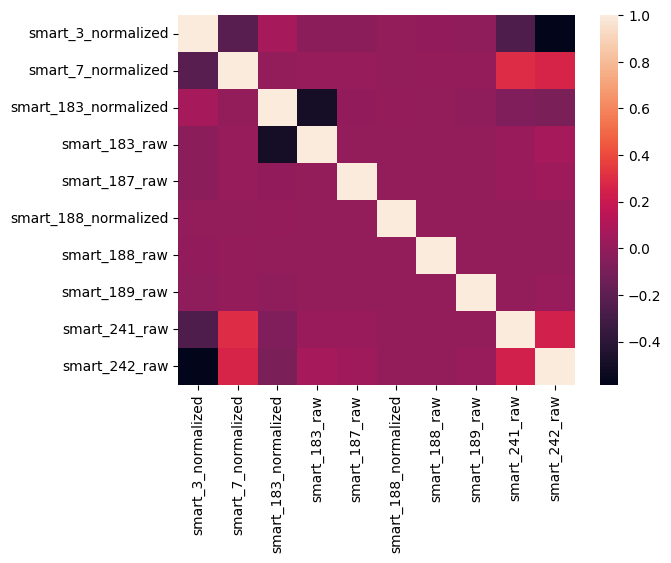

In [41]:
import seaborn as sns
x_train_heat = pd.DataFrame(X_train_re,columns = downsampled_df.drop(['failure'],axis = 1).columns)
sns.heatmap(x_train_heat.iloc[:,selected_feature].corr())
# sns.heatmap(downsampled_df.iloc[:, [2, 8, 9, 20, 22, 23, 24, 25, 43, 45]].corr())

# Model building

## Importing Models

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score

In [43]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


### Different classfier we are using

In [44]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

## Function for training classifier

In [45]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

### Random Forest Classifier

In [46]:
train_classifier(rfc,X_train_selected,y_train_re.values,X_test_selected,y_test.values)

(0.9434666666666667, 0.8452617507857942)

In [47]:
#  Table for models metrics


# accuracy_scores = []
# precision_scores = []

# for name,clf in clfs.items():

#     current_accuracy,current_precision = train_classifier(clf, X_train_selected,y_train.values,X_test_selected,y_test.values)

#     print("For ",name)
#     print("Accuracy - ",current_accuracy)
#     print("Precision - ",current_precision)

#     accuracy_scores.append(current_accuracy)
#     precision_scores.append(current_precision)

### Extra Tree Classfier

In [48]:
train_classifier(etc,X_train_selected,y_train_re.values,X_test_selected,y_test.values)

(0.9454416666666666, 0.8473468801608387)

### Extreme Gradient boosting

In [49]:
train_classifier(xgb,X_train_selected,y_train_re.values,X_test_selected,y_test.values)

(0.7743833333333333, 0.48150708606982373)

### Bagging Classfier

In [50]:
train_classifier(bc,X_train_selected,y_train_re.values,X_test_selected,y_test.values)

(0.940825, 0.836002860207365)

### Decision Tree Classifier

In [51]:
train_classifier(dtc,X_train_selected,y_train_re.values,X_test_selected,y_test.values)

(0.6110666666666666, 0.3101109628356763)